In [8]:
import MDAnalysis as mda
from MDAnalysis.transformations import unwrap
import numpy as np
import copy

In [9]:
import matplotlib.pyplot as plt

In [30]:
# Keep molecule full
u = mda.Universe("equilibrated.data") #, "dump.xtc")
u.transfer_to_memory()
all_direction_shift = np.zeros((u.residues.n_residues, 3)) # to ensure the shift of a residue is always in the same direction --> prevent unatural jumps
dims = u.dimensions[:3]
res = u.residues[0]
ires = 0
for res, ires in zip(u.residues, np.arange(u.residues.n_residues)):
    com = res.atoms.center_of_mass()
    positions = copy.deepcopy(res.atoms.positions)
    median_positions = np.median(positions, axis=0)
    all_error = np.sqrt((positions - median_positions)**2) > dims/2
    xyz_error = np.sum(all_error, axis=0)
    error = np.sum(all_error)
    for issue_i, sum_issue_i, com_i, dim_i, i, pos_i, med_i in zip(all_error.T, xyz_error,
                                                                    com, dims, [0, 1, 2],
                                                                    positions.T, median_positions):
        direction_shift = all_direction_shift[ires, i]
        if sum_issue_i > 0 :
            if ((direction_shift < 0.1) & (direction_shift > -0.1)):
                if med_i < 0:
                    all_direction_shift[ires, i] = -1.0
                else:
                    all_direction_shift[ires, i] = 1.0
                direction_shift = all_direction_shift[ires, i]
            if direction_shift < 0:
                positions[issue_i, i] -= dim_i
            elif direction_shift > 0:
                positions[issue_i, i] += dim_i
            else:
                print("There is a problem")

            median_positions = np.median(positions, axis=0)
            all_error = np.sqrt((positions - median_positions)**2) > dims/2
            xyz_error = np.sum(all_error, axis=0)
            error = np.sum(all_error)
            assert error == 0

            res.atoms.positions = copy.deepcopy(positions)

/home/simon/.local/lib/python3.12/site-packages/MDAnalysis/core/universe.py:658: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


AssertionError: 

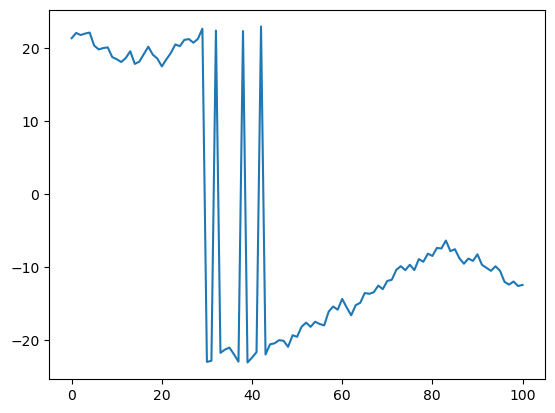

In [34]:
plt.plot(positions[:, 2])

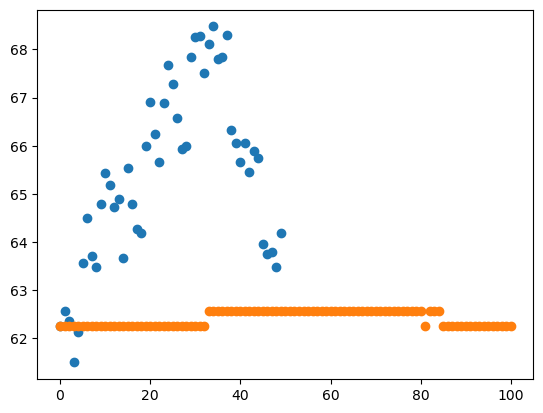

In [23]:
plt.plot(positions[:, 1][issue_i], 'o')
plt.plot(positions[:, 1][1-issue_i], 'o')

In [ ]:
com < dims<2

In [ ]:
# Assert continuity
u = mda.Universe("created.data", "mol1.xtc")
u.transfer_to_memory()
for ts in u.trajectory:
    dims = ts.dimensions[:3]
    all_com = []
    for res, ires in zip(u.residues, np.arange(u.residues.n_residues)):
        com = res.atoms.center_of_mass()
        positions = res.atoms.positions
        if ts.frame > 0:
            prev_com = all_prev_com[ires]
            diffs = prev_com - com
            anomalies = np.abs(diffs)>dims/2 # detect jump
            for anomalie, dim, i, diff in zip(anomalies, dims, [0, 1, 2], diffs):
                if anomalie:
                    if diff<0:
                        positions[:, i] -= dim
                        print(com)
                        stop
                    else:
                        positions[:, i] += dim
                        print(com)
                        stop
        res.atoms.positions = positions
        com = res.atoms.center_of_mass()
        
        all_com.append(com)
        if ts.frame > 0:
            diffs = prev_com - com    
            if np.sum(np.abs(diffs)>dims/2) > 0:
                print("warning:still a pb")
    all_prev_com = copy.deepcopy(all_com)
with mda.Writer("mol.xtc", u.atoms.n_atoms) as W:
    for ts_temp in u.trajectory:
        W.write(u)  

In [ ]:
res.atoms.positions = positions
com = res.atoms.center_of_mass()
com

In [ ]:
prev_com

In [ ]:
com

In [ ]:
com